In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")

california = fetch_california_housing()
housing_data = pd.DataFrame(california.data, columns=california.feature_names)
housing_data["MedHouseVal"] = california.target

feature = "MedInc"

print("Структура данных:")
housing_data.info()

print("\nПервые 5 строк данных:")
display(housing_data.head())

print("\nПроверка пропущенных значений:")

missing_counts = housing_data.isnull().sum()
missing_percent = housing_data.isnull().mean() * 100
missings = pd.DataFrame(
    data=[missing_counts, missing_percent],
    index=["Количество пропусков", "Процент пропусков"],
).T
display(missings)

Структура данных:
<class 'pandas.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB

Первые 5 строк данных:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422



Проверка пропущенных значений:


,Количество пропусков,Процент пропусков
MedInc,0.0,0.0
HouseAge,0.0,0.0
AveRooms,0.0,0.0
AveBedrms,0.0,0.0
Population,0.0,0.0
AveOccup,0.0,0.0
Latitude,0.0,0.0
Longitude,0.0,0.0
MedHouseVal,0.0,0.0


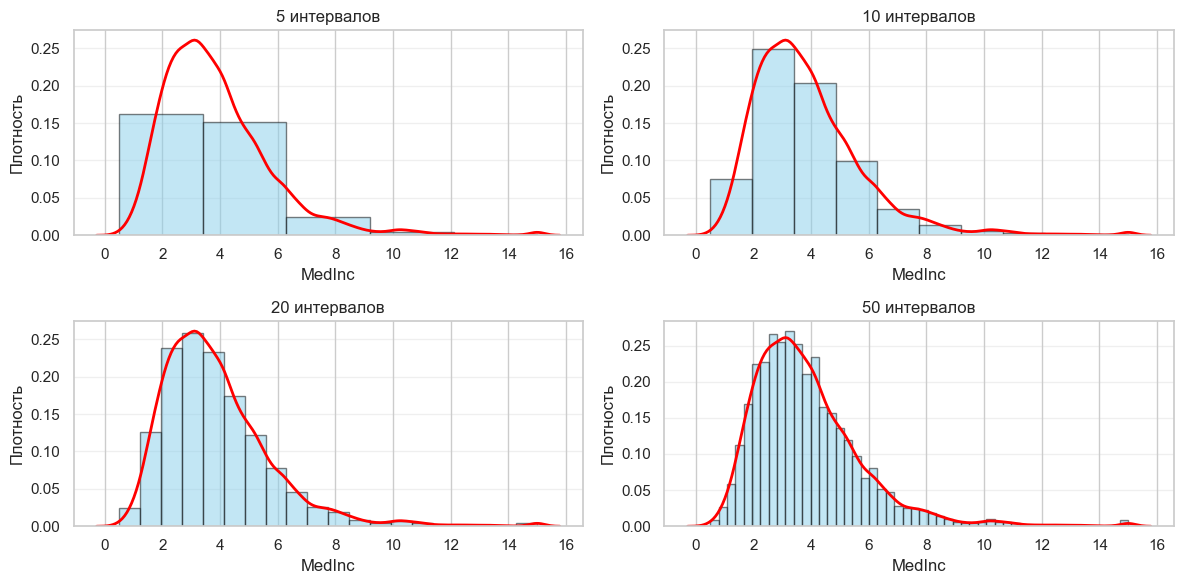

In [2]:
plt.figure(figsize=(12, 6))

bins_list = [5, 10, 20, 50]
for i, bins in enumerate(bins_list, 1):
    plt.subplot(2, 2, i)
    plt.hist(
        housing_data[feature],
        bins=bins,
        density=True,
        alpha=0.5,
        color="skyblue",
        edgecolor="black",
    )
    sns.kdeplot(housing_data[feature], color="red", linewidth=2)
    plt.title(f"{bins} интервалов")
    plt.xlabel("MedInc")
    plt.ylabel("Плотность")
    plt.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

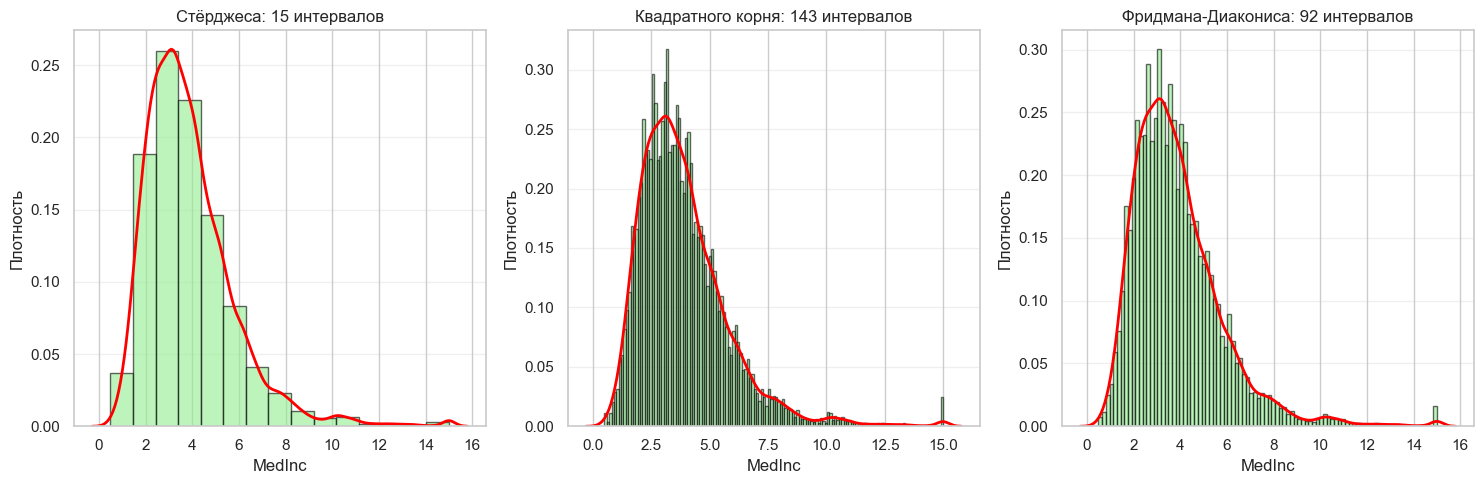

In [3]:
n = len(housing_data[feature])

bins_sturges = int(1 + 3.322 * np.log10(n))

bins_sqrt = int(np.sqrt(n))

iqr = np.percentile(housing_data[feature], 75) - np.percentile(
    housing_data[feature], 25
)
bin_width = 2 * iqr * (n ** (-1 / 3))
bins_fd = int(
    np.ceil((housing_data[feature].max() - housing_data[feature].min()) / bin_width)
)

plt.figure(figsize=(15, 5))

rules = [
    ("Стёрджеса", bins_sturges),
    ("Квадратного корня", bins_sqrt),
    ("Фридмана-Диакониса", bins_fd),
]
for i, (name, bins) in enumerate(rules, 1):
    plt.subplot(1, 3, i)
    plt.hist(
        housing_data[feature],
        bins=bins,
        density=True,
        alpha=0.6,
        color="lightgreen",
        edgecolor="black",
    )
    sns.kdeplot(housing_data[feature], color="red", linewidth=2)
    plt.title(f"{name}: {bins} интервалов")
    plt.xlabel("MedInc")
    plt.ylabel("Плотность")
    plt.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

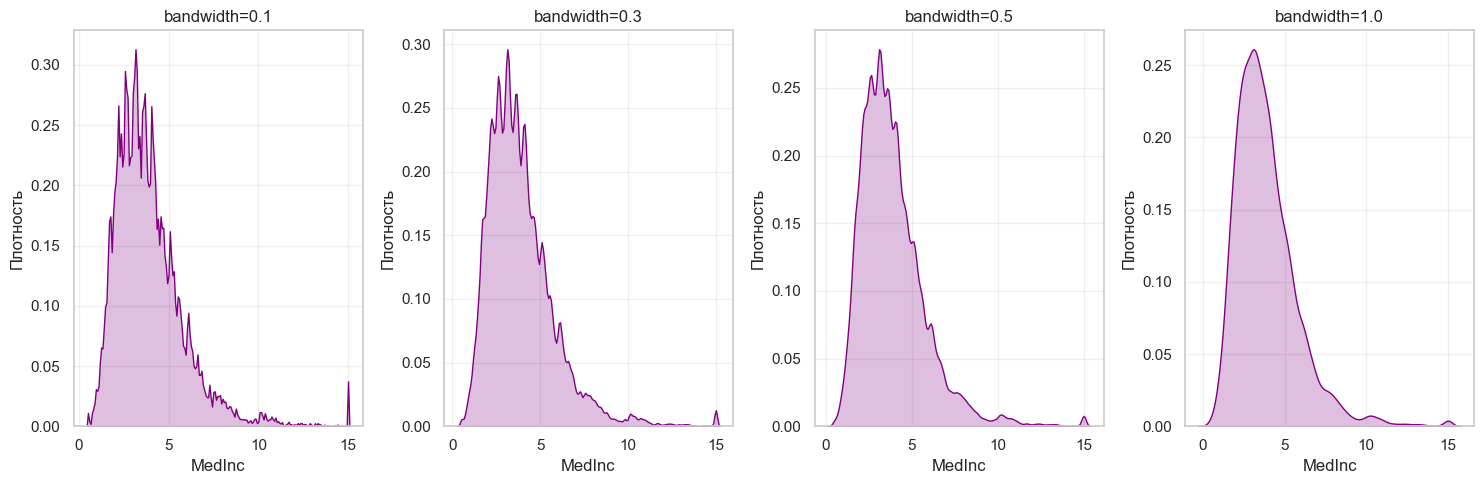

In [4]:
bandwidths = [0.1, 0.3, 0.5, 1.0]

plt.figure(figsize=(15, 5))
for i, bw in enumerate(bandwidths, 1):
    plt.subplot(1, 4, i)
    sns.kdeplot(housing_data[feature], bw_adjust=bw, color="purple", fill=True)
    plt.title(f"bandwidth={bw}")
    plt.xlabel("MedInc")
    plt.ylabel("Плотность")
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

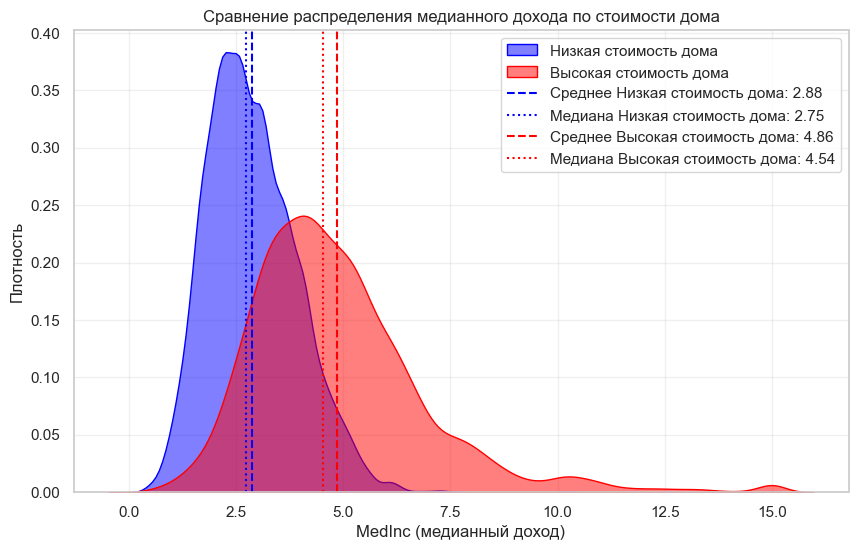

In [5]:
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)


median_value = housing_data["MedHouseVal"].median()
high_value = housing_data[housing_data["MedHouseVal"] >= median_value]
low_value = housing_data[housing_data["MedHouseVal"] < median_value]

plt.figure(figsize=(10, 6))
sns.kdeplot(
    low_value["MedInc"],
    color="blue",
    fill=True,
    alpha=0.5,
    label="Низкая стоимость дома",
)
sns.kdeplot(
    high_value["MedInc"],
    color="red",
    fill=True,
    alpha=0.5,
    label="Высокая стоимость дома",
)

for data, color, label in zip(
    [low_value, high_value],
    ["blue", "red"],
    ["Низкая стоимость дома", "Высокая стоимость дома"],
):
    mean_val = data["MedInc"].mean()
    median_val = data["MedInc"].median()
    plt.axvline(
        mean_val, color=color, linestyle="--", label=f"Среднее {label}: {mean_val:.2f}"
    )
    plt.axvline(
        median_val,
        color=color,
        linestyle=":",
        label=f"Медиана {label}: {median_val:.2f}",
    )

plt.title("Сравнение распределения медианного дохода по стоимости дома")
plt.xlabel("MedInc (медианный доход)")
plt.ylabel("Плотность")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

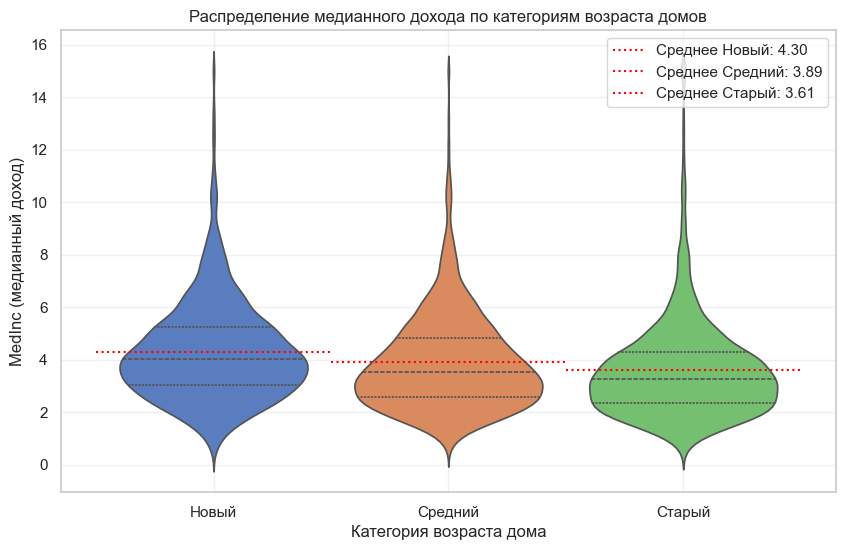

In [6]:
bins = [0, 15, 35, housing_data["HouseAge"].max()]
labels = ["Новый", "Средний", "Старый"]
housing_data["HouseAgeCat"] = pd.cut(housing_data["HouseAge"], bins=bins, labels=labels)

plt.figure(figsize=(10, 6))

sns.violinplot(
    x="HouseAgeCat", y="MedInc", data=housing_data, inner="quartile", palette="muted"
)

for i, cat in enumerate(labels):
    subset = housing_data[housing_data["HouseAgeCat"] == cat]["MedInc"]
    mean_val = subset.mean()
    plt.hlines(
        mean_val,
        xmin=i - 0.5,
        xmax=i + 0.5,
        color=color,
        linestyle=":",
        label=f"Среднее {cat}: {mean_val:.2f}",
    )

plt.title("Распределение медианного дохода по категориям возраста домов")
plt.xlabel("Категория возраста дома")
plt.ylabel("MedInc (медианный доход)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

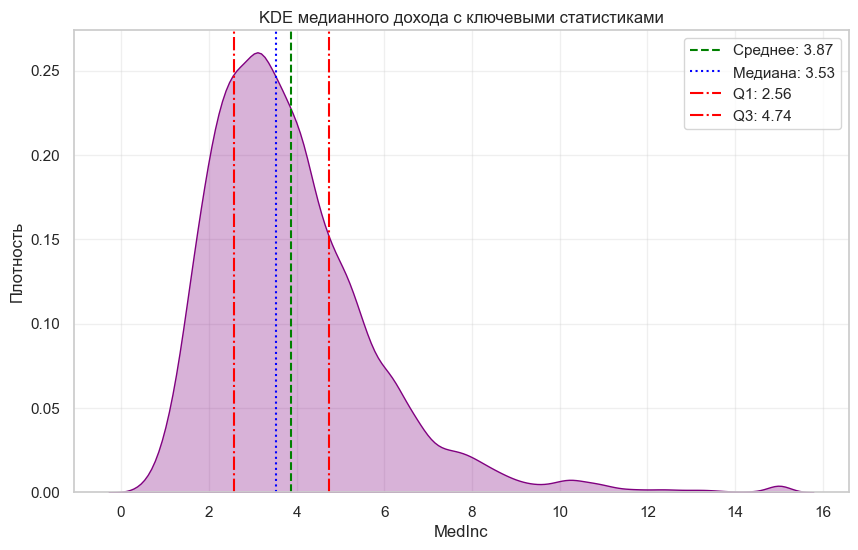

In [7]:
plt.figure(figsize=(10, 6))
sns.kdeplot(housing_data["MedInc"], color="purple", fill=True, alpha=0.3)

mean_val = housing_data["MedInc"].mean()
median_val = housing_data["MedInc"].median()
q1, q3 = housing_data["MedInc"].quantile([0.25, 0.75])

plt.axvline(mean_val, color="green", linestyle="--", label=f"Среднее: {mean_val:.2f}")
plt.axvline(median_val, color="blue", linestyle=":", label=f"Медиана: {median_val:.2f}")
plt.axvline(q1, color="red", linestyle="-.", label=f"Q1: {q1:.2f}")
plt.axvline(q3, color="red", linestyle="-.", label=f"Q3: {q3:.2f}")

plt.title("KDE медианного дохода с ключевыми статистиками")
plt.xlabel("MedInc")
plt.ylabel("Плотность")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [8]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from IPython.display import Markdown

np.random.seed(42)

adult = fetch_openml(name="adult", version=2, as_frame=True)
income_data: pd.DataFrame = adult.frame

print("Структура данных:")
income_data.info()

print("\nПервые 5 строк данных:")
display(income_data.sample(n=5))

print("\nПроверка пропущенных значений:")

missing_counts = income_data.isnull().sum()
missing_percent = income_data.isnull().mean() * 100
missings = pd.DataFrame(
    data=[missing_counts, missing_percent],
    index=["Количество пропусков", "Процент пропусков"],
).T
display(missings)

Структура данных:
<class 'pandas.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             48842 non-null  int64   
 1   workclass       46043 non-null  category
 2   fnlwgt          48842 non-null  int64   
 3   education       48842 non-null  category
 4   education-num   48842 non-null  int64   
 5   marital-status  48842 non-null  category
 6   occupation      46033 non-null  category
 7   relationship    48842 non-null  category
 8   race            48842 non-null  category
 9   sex             48842 non-null  category
 10  capital-gain    48842 non-null  int64   
 11  capital-loss    48842 non-null  int64   
 12  hours-per-week  48842 non-null  int64   
 13  native-country  47985 non-null  category
 14  class           48842 non-null  category
dtypes: category(9), int64(6)
memory usage: 2.7 MB

Первые 5 строк данных:


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
7762,56,Private,33115,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
23881,25,Private,112847,HS-grad,9,Married-civ-spouse,Transport-moving,Own-child,Other,Male,0,0,40,United-States,<=50K
30507,43,Private,170525,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,14344,0,40,United-States,>50K
28911,32,Private,186788,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
19484,39,Private,277886,Bachelors,13,Married-civ-spouse,Sales,Wife,White,Female,0,0,30,United-States,<=50K



Проверка пропущенных значений:


,Количество пропусков,Процент пропусков
age,0.0,0.000000
workclass,2799.0,5.730724
fnlwgt,0.0,0.000000
education,0.0,0.000000
education-num,0.0,0.000000
marital-status,0.0,0.000000
occupation,2809.0,5.751198
relationship,0.0,0.000000
race,0.0,0.000000
sex,0.0,0.000000


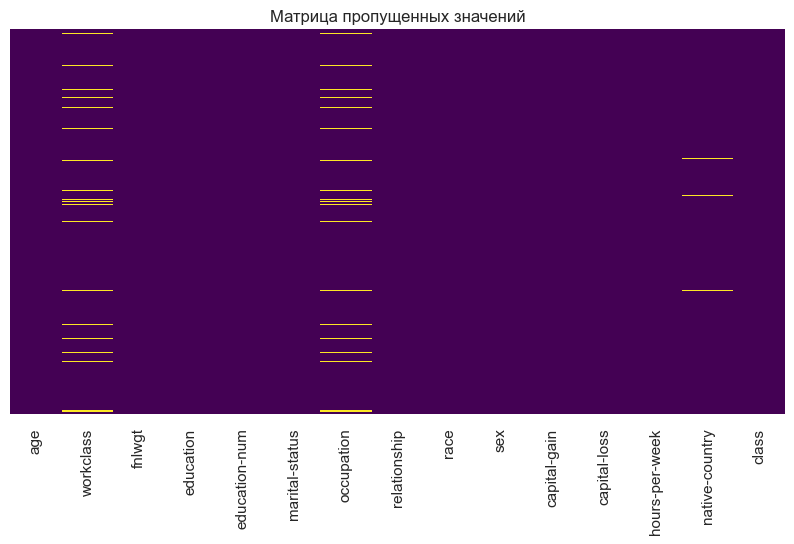

In [9]:
plt.figure(figsize=(10, 5))
sns.heatmap(income_data.isnull(), cbar=False, yticklabels=False, cmap="viridis")
plt.title("Матрица пропущенных значений")
plt.show()

In [10]:
income_data.dropna(inplace=True)

In [11]:
income_data["income_binary"] = (
    income_data["class"].apply(lambda x: 1 if x == ">50K" else 0).astype(int)
)


def percent(x):
    return np.mean(x) * 100


pivot = pd.pivot_table(
    income_data,
    values="income_binary",
    index="native-country",
    columns="education",
    aggfunc=[percent],
)

formatted_pivot = pivot.style.format("{:.2f}")
display(formatted_pivot)

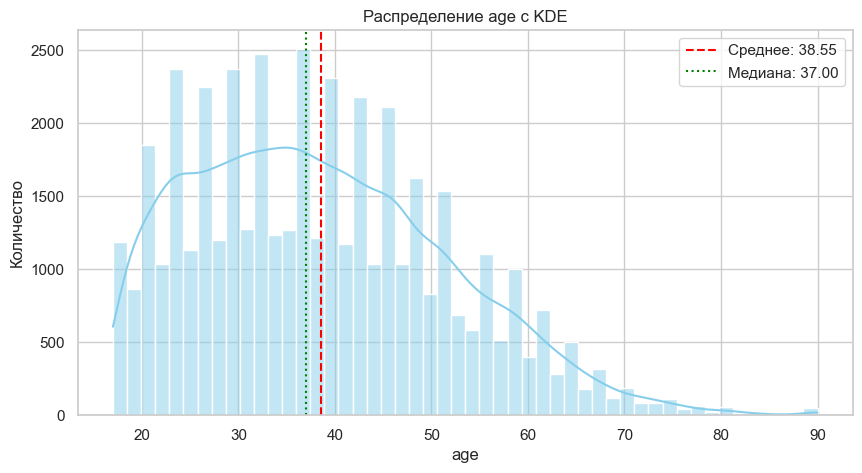

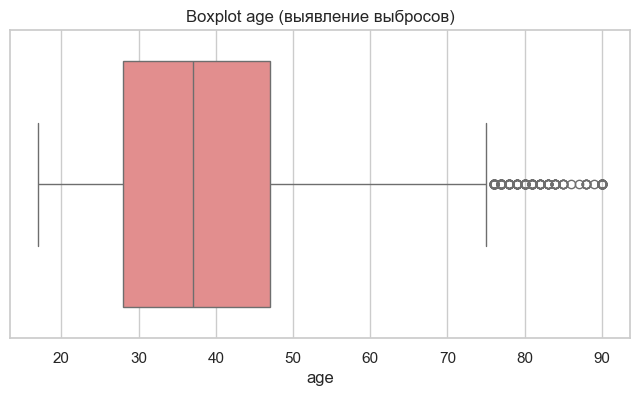

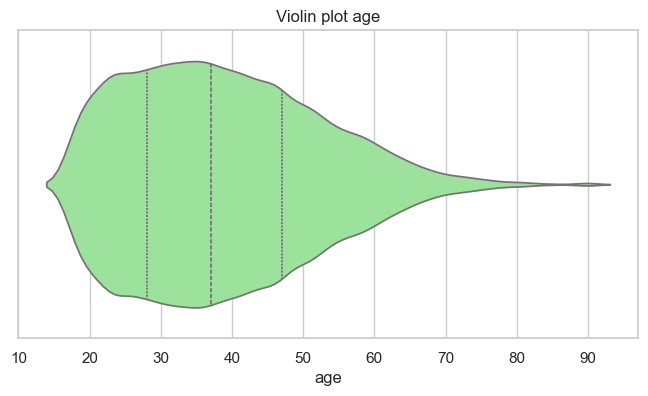

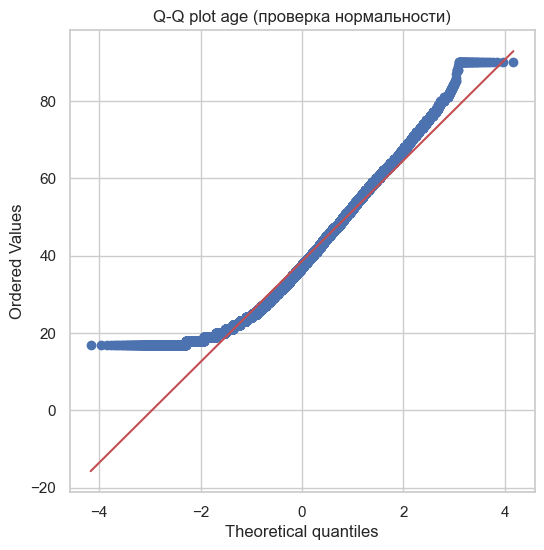

---

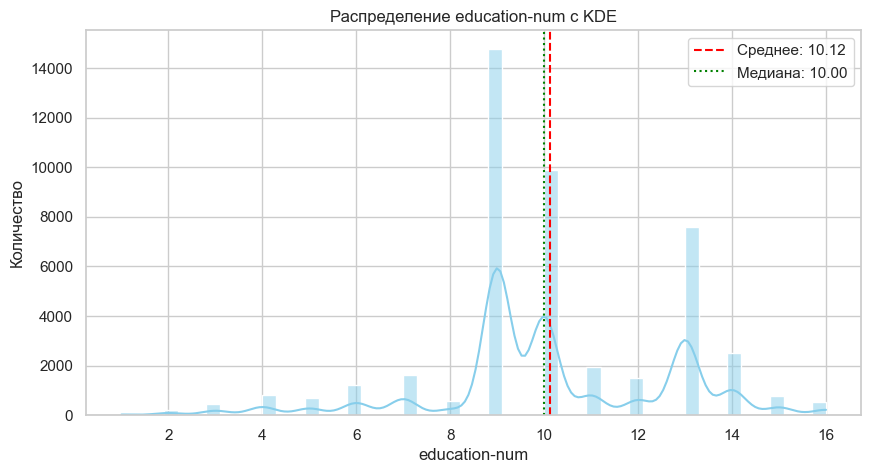

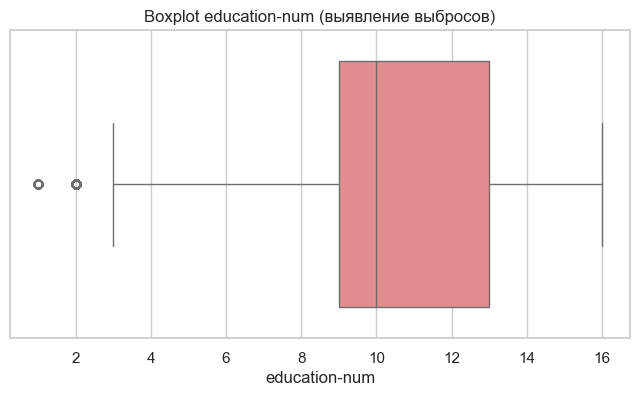

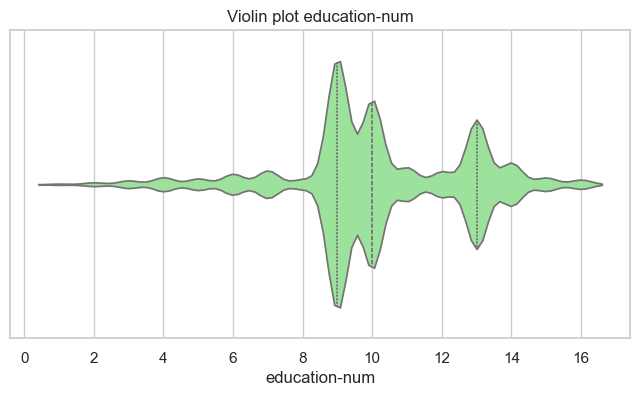

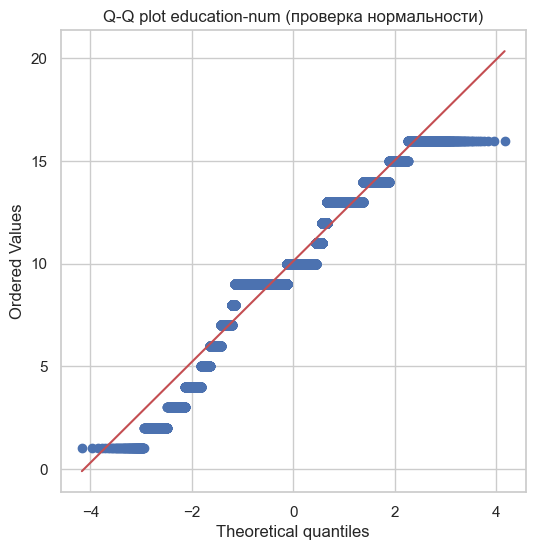

---

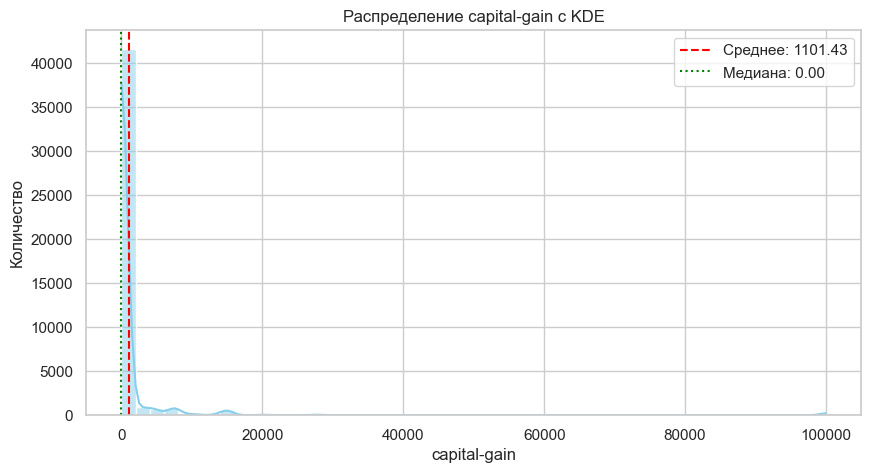

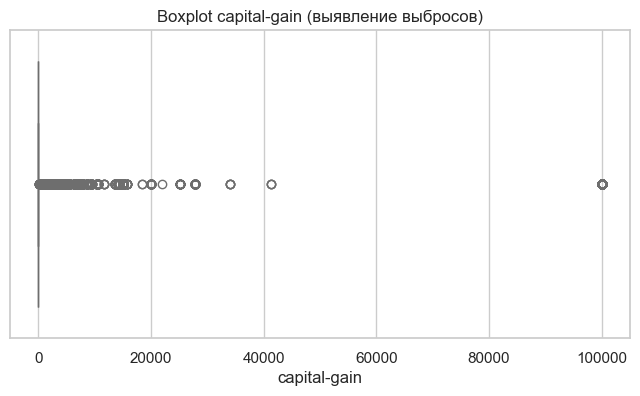

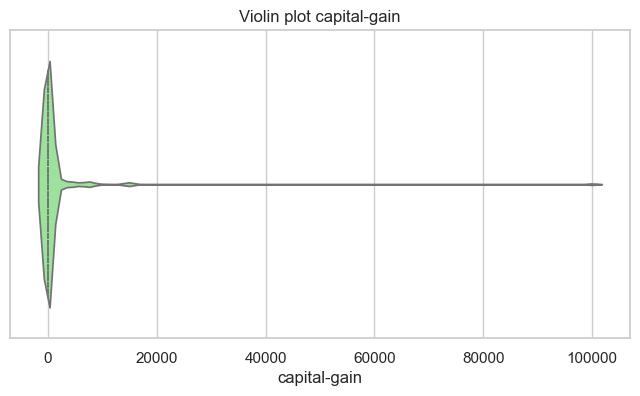

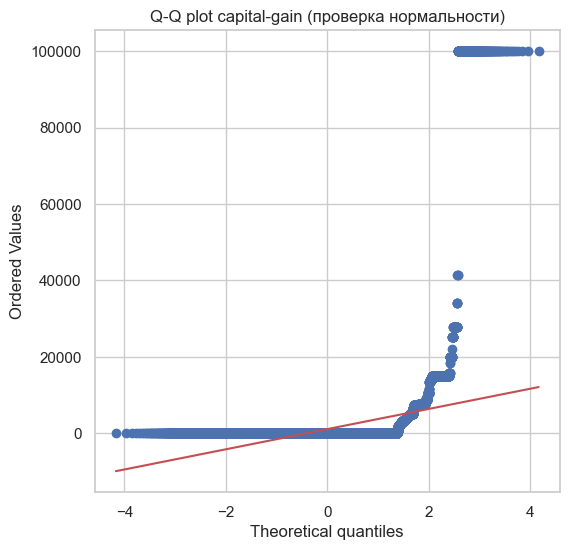

---

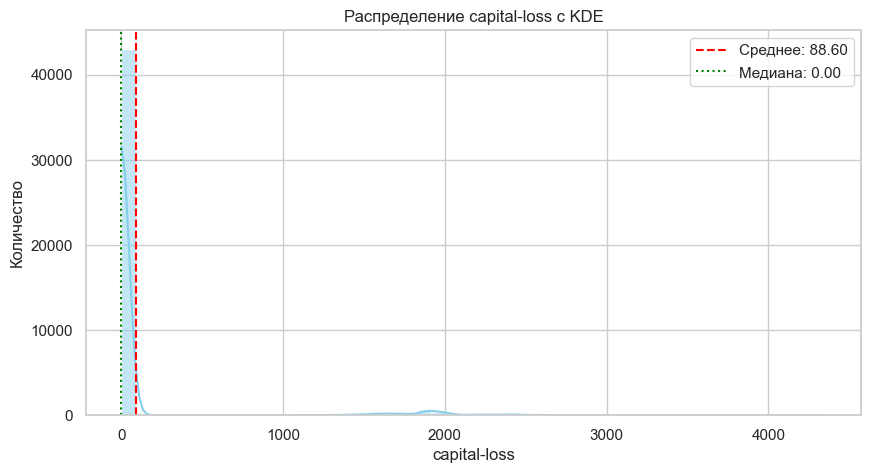

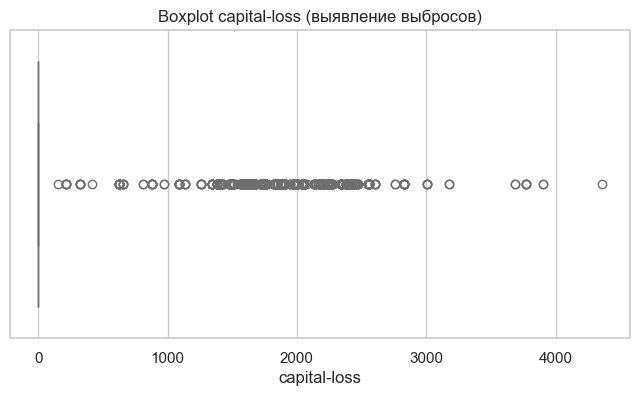

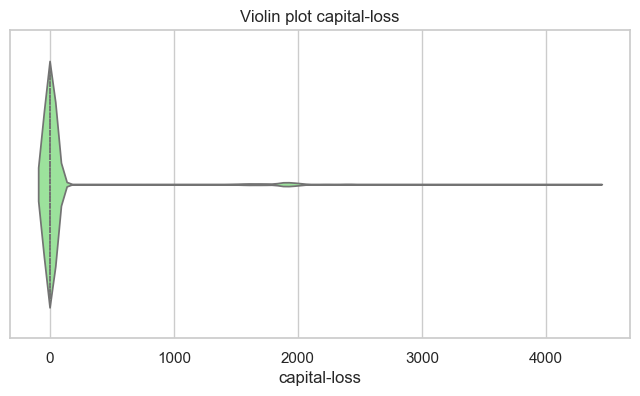

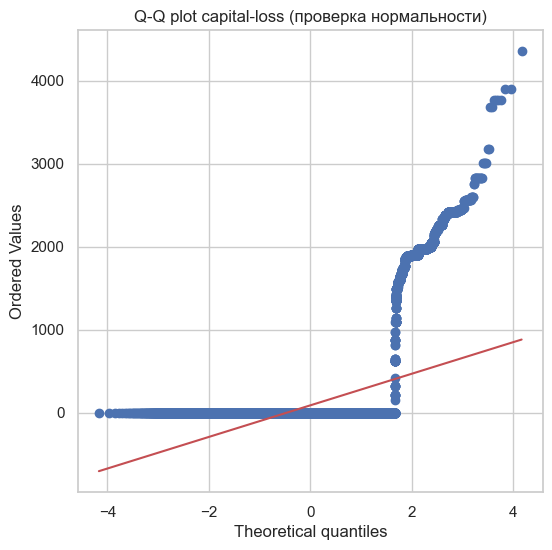

---

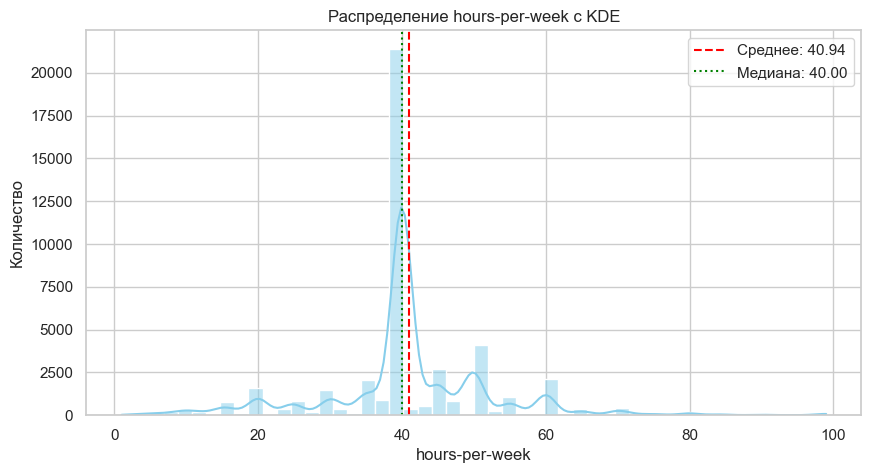

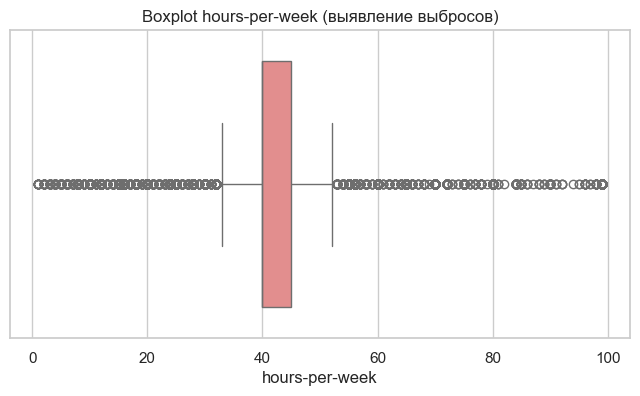

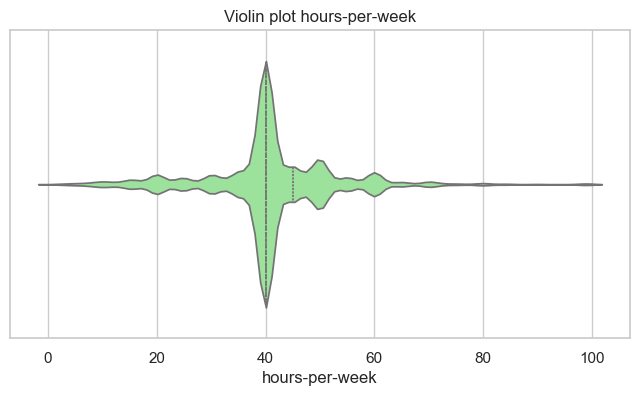

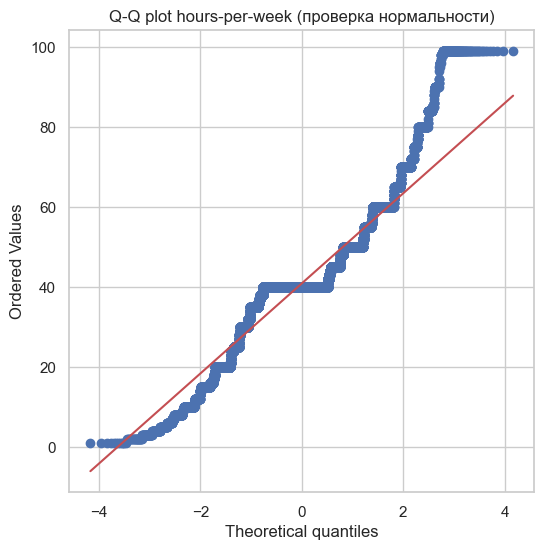

In [12]:
features = ["age", "education-num", "capital-gain", "capital-loss", "hours-per-week"]

count = len(features)

for i, feature in enumerate(features):
    plt.figure(figsize=(10, 5))
    sns.histplot(income_data[feature], kde=True, color="skyblue", bins=50)
    plt.title(f"Распределение {feature} с KDE")
    plt.xlabel(feature)
    plt.ylabel("Количество")

    # Boxplot и аннотации статистики
    q1, median, q3 = income_data[feature].quantile([0.25, 0.5, 0.75])
    mean_val = income_data[feature].mean()
    plt.axvline(mean_val, color="red", linestyle="--", label=f"Среднее: {mean_val:.2f}")
    plt.axvline(median, color="green", linestyle=":", label=f"Медиана: {median:.2f}")
    plt.legend()
    plt.show()

    # Boxplot
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=income_data[feature], color="lightcoral")
    plt.title(f"Boxplot {feature} (выявление выбросов)")
    plt.show()

    # Violin plot
    plt.figure(figsize=(8, 4))
    sns.violinplot(x=income_data[feature], color="lightgreen", inner="quartile")
    plt.title(f"Violin plot {feature}")
    plt.show()

    # Q-Q plot
    plt.figure(figsize=(6, 6))
    stats.probplot(income_data[feature], dist="norm", plot=plt)
    plt.title(f"Q-Q plot {feature} (проверка нормальности)")
    plt.show()

    if i < count - 1:
        display(Markdown("---"))

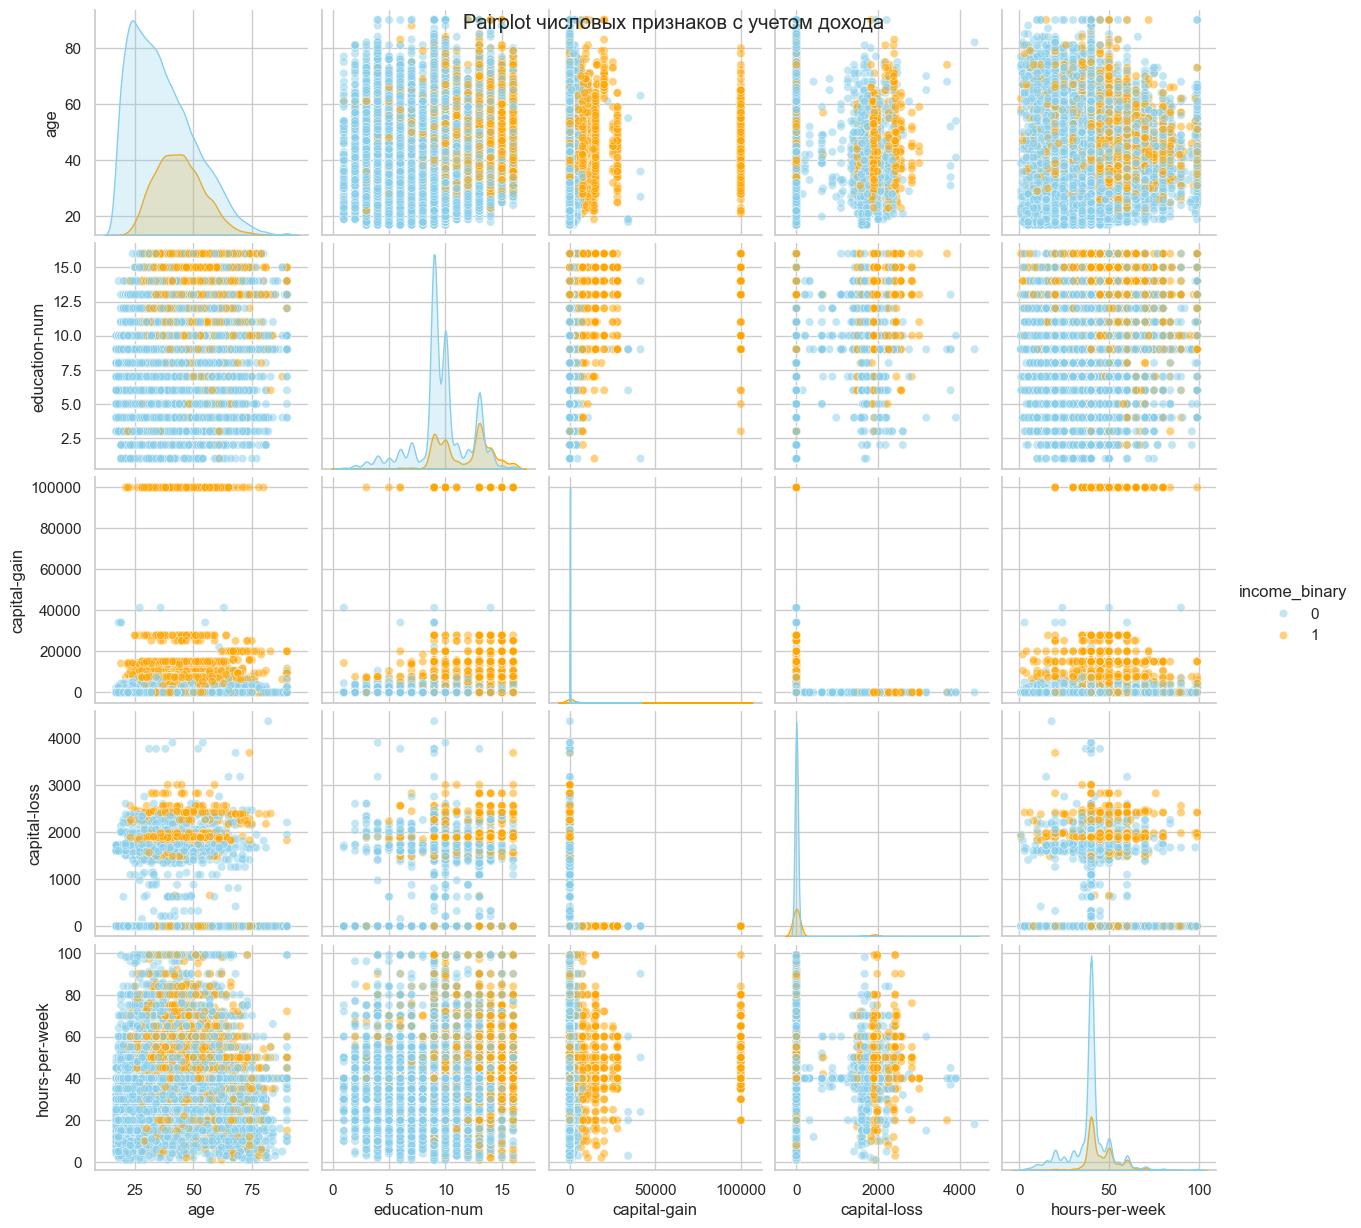

In [13]:
sns.pairplot(
    income_data,
    vars=features,
    hue="income_binary",
    palette={0: "skyblue", 1: "orange"},
    diag_kind="kde",
    plot_kws={"alpha": 0.5},
)
plt.suptitle("Pairplot числовых признаков с учетом дохода")
plt.show()

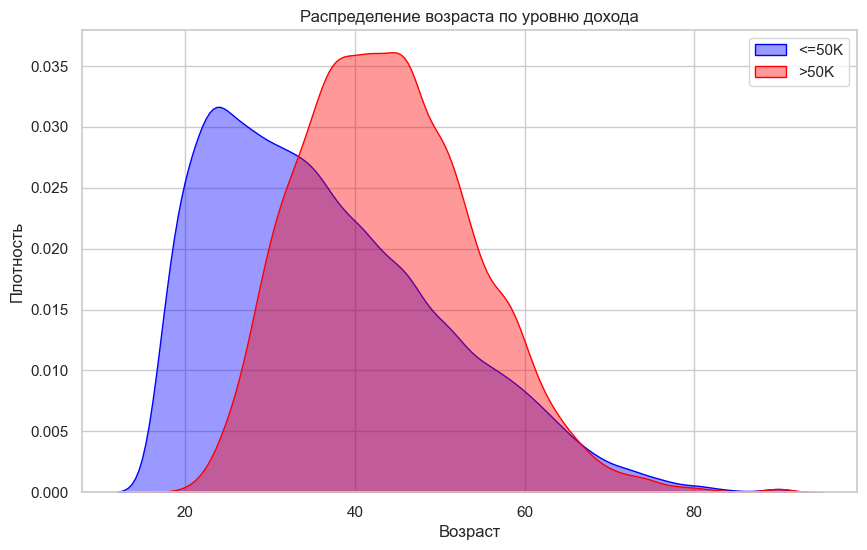

In [14]:
plt.figure(figsize=(10, 6))
sns.kdeplot(
    income_data[income_data["income_binary"] == 0]["age"],
    color="blue",
    fill=True,
    alpha=0.4,
    label="<=50K",
)
sns.kdeplot(
    income_data[income_data["income_binary"] == 1]["age"],
    color="red",
    fill=True,
    alpha=0.4,
    label=">50K",
)
plt.title("Распределение возраста по уровню дохода")
plt.xlabel("Возраст")
plt.ylabel("Плотность")
plt.legend()
plt.show()

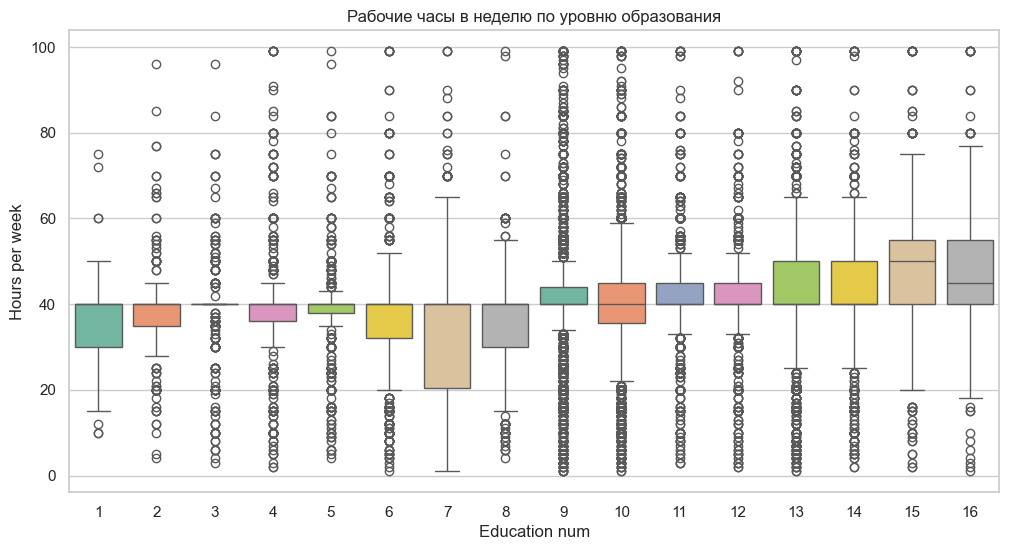

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="education-num", y="hours-per-week", data=income_data, palette="Set2")
plt.title("Рабочие часы в неделю по уровню образования")
plt.xlabel("Education num")
plt.ylabel("Hours per week")
plt.show()

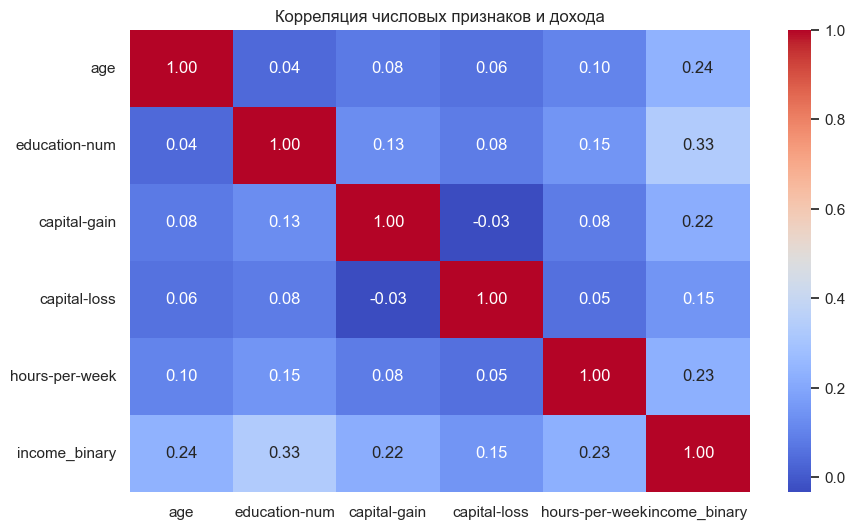

In [16]:
corr_features = features + ["income_binary"]
corr = income_data[corr_features].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляция числовых признаков и дохода")
plt.show()